In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold  # Add StratifiedKFold import
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report

In [3]:
data = pd.read_csv("data/CICIDS2017_sample_km.csv")
data.head(10)

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,-0.528463,-0.068426,-0.051737,-0.030747,-0.047355,-0.191864,0.582875,-0.029612,-0.255104,-0.540252,...,0.742115,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,0
1,-0.528467,-0.068426,-0.051737,-0.034119,-0.048233,-0.245670,-0.169382,-0.236405,-0.255104,-0.557556,...,-0.434903,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,0
2,-0.528468,-0.086001,-0.066771,-0.034306,-0.048288,-0.248659,-0.211174,-0.247894,-0.255104,-0.557556,...,1.919134,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,5
3,2.614627,0.177625,0.128679,-0.007751,-0.046055,0.598791,-0.211174,-0.044332,0.375604,-0.469594,...,0.742115,-0.053436,-0.028779,-0.027271,-0.041840,-0.147606,-0.136892,-0.163545,-0.128792,0
4,1.411319,-0.015701,0.053506,0.509294,-0.047776,10.535028,-0.211174,13.086813,14.551599,-0.552509,...,-1.023413,-0.083676,-0.081786,-0.107967,-0.066497,0.636421,6.405734,1.484204,-0.254479,0
5,1.351134,-0.068426,-0.051737,-0.029810,-0.047465,-0.176917,0.791835,0.027830,-0.255104,-0.542415,...,-1.023413,-0.087819,-0.081786,-0.111231,-0.070979,1.688014,-0.137651,1.623536,1.720206,0
6,-0.528468,-0.086001,-0.066771,-0.034306,-0.048288,-0.248659,-0.211174,-0.247894,-0.255104,-0.557556,...,1.919134,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,5
7,-0.526230,-0.050851,0.008402,-0.033088,0.057881,-0.218767,-0.211174,-0.198110,-0.209439,1.019281,...,-1.023413,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,3
8,-0.505663,-0.050851,-0.021667,-0.033088,0.057881,-0.218767,-0.211174,-0.198110,-0.209439,3.620304,...,-1.023413,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,3
9,-0.528469,-0.086001,-0.066771,-0.034306,-0.048288,-0.248659,-0.211174,-0.247894,-0.255104,-0.557556,...,1.919134,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,5


In [4]:
data.info

<bound method DataFrame.info of       Flow Duration  Total Fwd Packets  Total Backward Packets  \
0         -0.528463          -0.068426               -0.051737   
1         -0.528467          -0.068426               -0.051737   
2         -0.528468          -0.086001               -0.066771   
3          2.614627           0.177625                0.128679   
4          1.411319          -0.015701                0.053506   
...             ...                ...                     ...   
4499      -0.392171          -0.015701               -0.036702   
4500      -0.391862          -0.015701               -0.006633   
4501      -0.392069          -0.033276               -0.021667   
4502      -0.528468          -0.086001               -0.066771   
4503      -0.528467          -0.086001               -0.066771   

      Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                       -0.030747                    -0.047355   
1                       -0.034119          

In [26]:
data.Label.value_counts()

Label
6    2180
1    1966
3     119
0     118
5      64
4      36
2      21
Name: count, dtype: int64

In [14]:
X = data.drop(columns=['Label'])  # Features
y = data['Label']

In [15]:
X = X.values
y = y.values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Initialize SVM classifier
clf = SVC(kernel='linear')

In [18]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [19]:
y_pred = clf.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
                          
print("Accuracy:", accuracy)

Accuracy: 0.9855715871254163


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 16   1   1   2   0   1   2]
 [  1 391   0   0   0   0   1]
 [  0   0   4   0   0   0   1]
 [  1   0   0  31   0   0   1]
 [  1   0   0   0   8   0   0]
 [  0   0   0   0   0  10   0]
 [  0   0   0   0   0   0 428]]


In [25]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9850327589830042
Recall: 0.9855715871254163
F1 Score: 0.9850508484541739


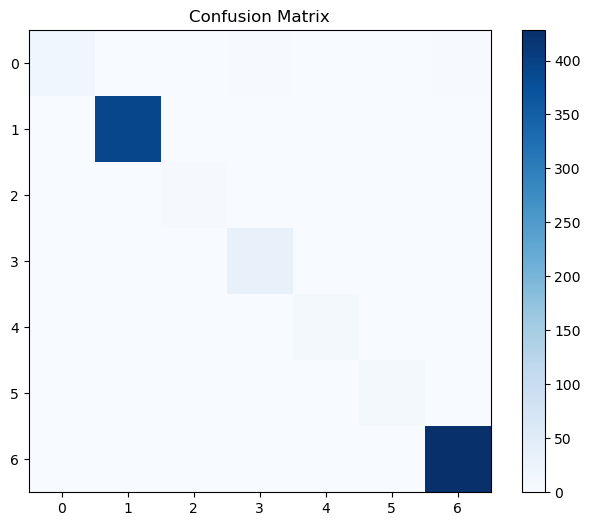

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

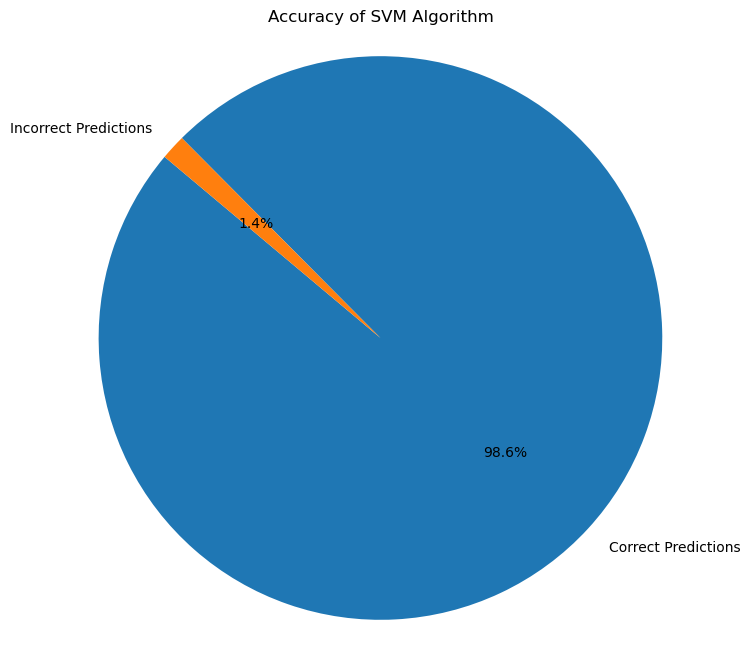

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

plt.figure(figsize=(8, 8))
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [accuracy, 1 - accuracy]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Accuracy of SVM Algorithm')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()